In [15]:
import os
os.getcwd()

'C:\\Users\\91954\\Downloads'

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets , layers, models
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [49]:
Image_size = [224, 224]
train_path = r"C:\Users\91954\Downloads\Computer vision\Train\Train"
test_path = r"C:\Users\91954\Downloads\Computer vision\Test"

In [50]:
vgg = VGG16(input_shape=Image_size + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [51]:
folders = glob(r'C:\Users\91954\Downloads\Computer vision\Train\Train/*')
folders

['C:\\Users\\91954\\Downloads\\Computer vision\\Train\\Train\\emilia-clarke',
 'C:\\Users\\91954\\Downloads\\Computer vision\\Train\\Train\\justin',
 'C:\\Users\\91954\\Downloads\\Computer vision\\Train\\Train\\kit-harington',
 'C:\\Users\\91954\\Downloads\\Computer vision\\Train\\Train\\nikolaj-coster-waldau',
 'C:\\Users\\91954\\Downloads\\Computer vision\\Train\\Train\\peter-dinklage']

In [52]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [62]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Zoom into images by up to 20%
    horizontal_flip=True,     # Flip images horizontally
    )

In [63]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
training_dataset = train_datagen.flow_from_directory(r"C:\Users\91954\Downloads\Computer vision\Train\Train",
                                                     target_size=(224,224), batch_size=32,
                                                     class_mode='categorical')

test_dataset = test_datagen.flow_from_directory(r"C:\Users\91954\Downloads\Computer vision\Test",
                                                target_size=(224,224), batch_size=32,
                                                class_mode ='categorical')

Found 32 images belonging to 5 classes.
Found 5 images belonging to 5 classes.


In [65]:
from keras.callbacks import EarlyStopping

model.fit(training_dataset, validation_data=test_dataset, epochs=10,
                                  steps_per_epoch= len(training_dataset),validation_steps=len(test_dataset))


Epoch 1/10
1/1 [==============================] - 23s 23s/step - loss: 0.6670 - accuracy: 0.7188 - val_loss: 1.2042 - val_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 21s 21s/step - loss: 0.6029 - accuracy: 0.7188 - val_loss: 0.7675 - val_accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 21s 21s/step - loss: 0.3484 - accuracy: 0.9375 - val_loss: 0.4149 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 21s 21s/step - loss: 0.2459 - accuracy: 0.9375 - val_loss: 0.2968 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 21s 21s/step - loss: 0.2505 - accuracy: 0.9375 - val_loss: 0.2838 - val_accuracy: 0.8000
Epoch 6/10
1/1 [==============================] - 21s 21s/step - loss: 0.2051 - accuracy: 0.9062 - val_loss: 0.2701 - val_accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 21s 21s/step - loss: 0.2053 - accuracy: 0.9375 - val_loss: 0.2290 - val_accuracy: 1.0000
Epoch 8/10
1/1 [===========

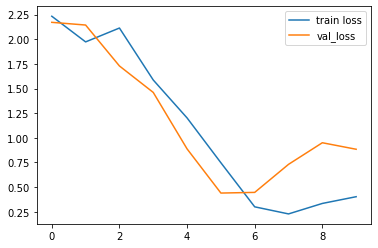

In [67]:
plt.plot(final_model.history['loss'], label='train loss')
plt.plot(final_model.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

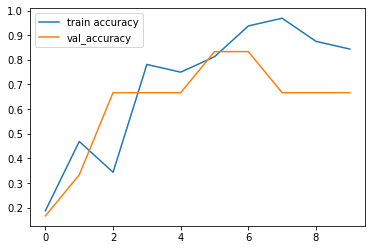

In [68]:
plt.plot(final_model.history['accuracy'], label='train accuracy')
plt.plot(final_model.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [69]:
# Save the model for computer vision
from keras.models import load_model
model.save("my_own_model.h5")

In [72]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model("my_own_model.h5")

# Load the class labels used during training
class_labels = ["Emilia", "justin","Nikolaj", "Kit","peter"] 

# Function to preprocess image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
   
    return img_array

# Path to your custom image
custom_image_path = r"C:\Users\91954\Downloads\kit.jpg"

# Preprocess the custom image
processed_image = preprocess_image(custom_image_path)

# Make predictions
predictions = model.predict(processed_image)

# Get the index of the predicted class
predicted_class_index = np.argmax(predictions)

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print("Predicted class label:", predicted_class_label)


1/1 [==============================] - 1s 979ms/step
Predicted class label: Kit


# Collect Images for Face Recognition

In [28]:
import numpy as np
import cv2

In [37]:
# Load HaarCasecade file for face recognition
face_classifier = cv2.CascadeClassifier(r"C:\Users\91954\Downloads\image\haarcascade_frontalface_default.xml")

# Create function for face extraction

def face_extractor(img):
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img, 1.3, 5)

    if faces is ():
        return None

    # crop all faces - if found
    for (x,y, w, h) in faces:
        x = x-10
        y = y -10
        cropped_face = img[y:y+h+50, x:x+w+50]
    return cropped_face

# Enabled webcam
cap = cv2.VideoCapture(0)
count = 0

# collect 200 samples of your face from webcam input

while True:
    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count +=1
        face = cv2.resize(face_extractor(frame), (400,400))
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save the image into the given folder
        file_name_path = './image/' + str(count) +'.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on image and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,0),2)
        cv2.imshow("My Face Cropper", face)
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1)==13 or count == 100:
        break

cap.release()
cv2.destroyAllWindows()
print("My pics sample collection completed.")

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-37-d9f0678dd347>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

In [27]:
from PIL import Image
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

In [39]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(r"C:\Users\91954\Downloads\image\haarcascade_frontalface_default.xml")

def face_extractor(img):
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img, 1.3, 5)

    if faces is ():
        return None
    # crop all faces - if found
    for (x,y, w, h) in faces:
        cv2.rectangle(img, (x,y),(x+w, y+h), (0,255,255), 2)
        cropped_face = img[y:y+h, x:x+h]
    return cropped_face

video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    face = face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224,224))
        im = Image.fromarray(face, 'RGB')
        img_array = np.array(im)
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        name = "Can't Predict!!"
        if(pred[0][1]>0.5):
            name ="Jyoti"
        cv2.putText(frame, name, (50,50), cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,0),2)
    else:
        cv2.putText(frame, "No face found", (50,50), cv2.FONT_HERSHEY_COMPLEX, 1,(0,255,0),2)
    cv2.imshow("Person name", frame )

    key = cv2.waitKey(1)
    if key ==ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-39-7241eccc4f48>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


1/1 [==============================] - 0s 251ms/step


In [40]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\91954\Downloads\image\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\91954\Downloads\haarcascade_eye_tree_eyeglasses.xml")

def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.05, minNeighbors = 5)

    for (x,y, w,h) in faces:
        cv2.rectangle(frame, (x,y),(x+w, y+h), (0,255,0),3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 2)

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey),(ex+ew, ey+eh), (0,255,111),2)
    return frame

video = cv2.VideoCapture(0)
while True:
    check, frame = video.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    detection = detect(gray, frame)
    cv2.imshow("detect my face and eye by using webcam", detection)

    key = cv2.waitKey(1)
    if key ==ord('q'):
        break

video.release()
cv2.destroyAllWindows()